In [16]:
from sklearn.cluster import KMeans 
import numpy as np
%matplotlib inline

In [3]:
x = np.array([
    [1,2],[1,4],[1,0],[10,2],[10,4],[10,0]
])

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)


In [7]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [8]:
kmeans.predict([[0,0],[12,3]])

array([1, 0])

In [9]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [11]:
n_sample = 1500
random_state = 170

In [13]:
X,y = make_blobs(n_samples=n_sample, random_state=random_state)

In [22]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

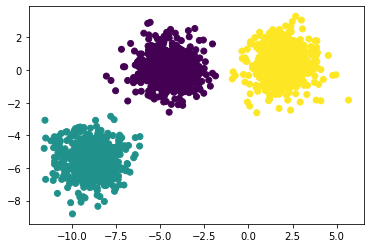

In [23]:
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [19]:
transformation = [[0.6834549,-0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [20]:
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_aniso)

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

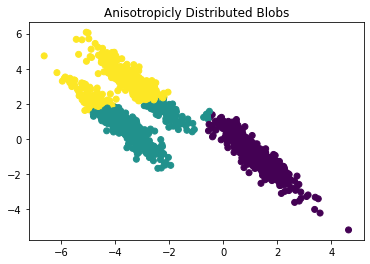

In [21]:
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

In [28]:
X_varide, y_varied = make_blobs(
    n_samples=n_sample,cluster_std=[1,2.5,0.5],
    random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varide)

Text(0.5, 1.0, 'Unequal variance')

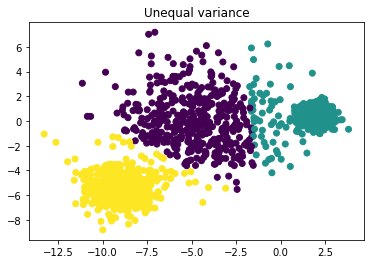

In [29]:
plt.scatter(X_varide[:,0],X_varide[:,1],c=y_pred)
plt.title("Unequal variance")

In [30]:
X_filtered = np.vstack((X[y==0][:500], X[y==1][:100],X[y==2][:10]))
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X_filtered)

Text(0.5, 1.0, 'Unevenly sized Blobs')

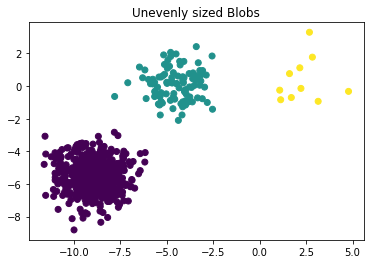

In [32]:
plt.scatter(X_filtered[:,0],X_filtered[:,1],c=y_pred)
plt.title("Unevenly sized Blobs")

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
X = np.array([
    [1,2],[1,4],[1,0],[4,2],[4,4],[4,0]
])

In [37]:
clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [38]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [39]:
import pandas as pd
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [41]:
np.random.seed(1234)
variables = ["X","Y","Z"]
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns=variables,index=labels)
print(df)

             X         Y         Z
ID_0  1.915195  6.221088  4.377277
ID_1  7.853586  7.799758  2.725926
ID_2  2.764643  8.018722  9.581394
ID_3  8.759326  3.578173  5.009951
ID_4  6.834629  7.127020  3.702508


In [42]:
row_clusters = linkage(pdist(df,metric="euclidean"),method='complete')
print(pd.DataFrame(row_clusters,
                  columns=["row label1","row label2",'distance','no. of items in clust.'],
                  index=["cluster %d"%(i+1) for i in range(row_clusters.shape[0])]))

           row label1  row label2  distance  no. of items in clust.
cluster 1         1.0         4.0  1.563509                     2.0
cluster 2         3.0         5.0  4.884559                     3.0
cluster 3         0.0         2.0  5.570985                     2.0
cluster 4         6.0         7.0  8.749445                     5.0


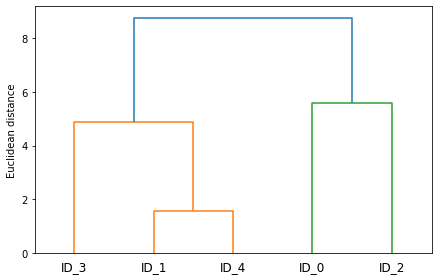

In [43]:
row_dendr = dendrogram(row_clusters,labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

In [44]:
from sklearn.cluster import DBSCAN

In [46]:
X = np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])

In [48]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering

DBSCAN(eps=3, min_samples=2)

In [49]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [50]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [51]:
centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)
x = StandardScaler().fit(X)

In [56]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [58]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('估计的聚类个数：%d' % n_clusters_)
print("估计的噪声点的个数：%d" % n_noise_)

估计的聚类个数：3
估计的噪声点的个数：22


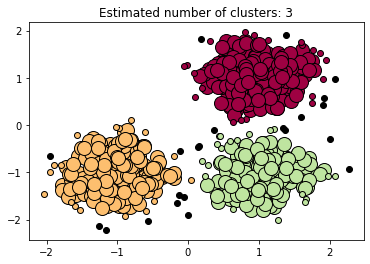

In [61]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels,colors):
    if k==-1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),
            markeredgecolor='k',markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=tuple(col),markeredgecolor="k",markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()